## Matviienko Kateryna, DA-11, Lab 1

In [165]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

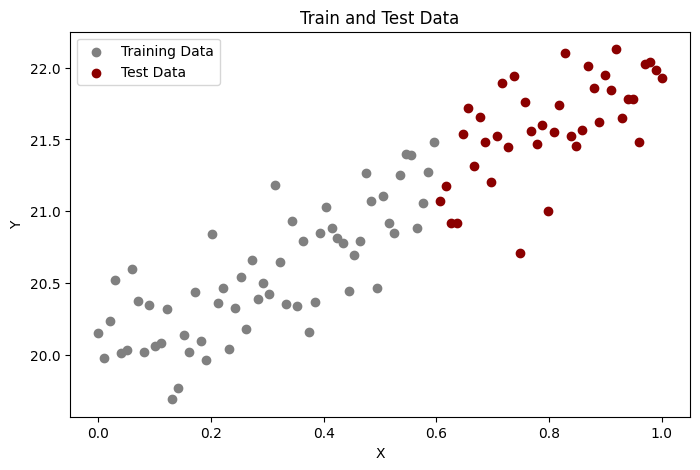

In [189]:
train_data = np.genfromtxt('C:\\Users\\Катя\\Desktop\\lab_1_train.csv', delimiter=',', skip_header=1)
X_train = train_data[:, 1] #ignore the first column containing indices
y_train = train_data[:, 2]

test_data = np.genfromtxt('C:\\Users\\Катя\\Desktop\\lab_1_test.csv', delimiter=',', skip_header=1)
X_test = test_data[:, 1]
y_test = test_data[:, 2]

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='grey', label='Training Data')
plt.scatter(X_test, y_test, color='darkred', label='Test Data')
plt.title('Train and Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Loss function (computes the average squared difference between predicted and actual values):

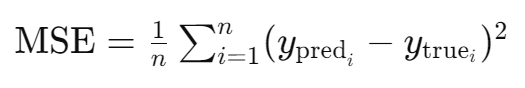

### Gradient descent (used to find the best path down to minimize mistakes in predicted values):

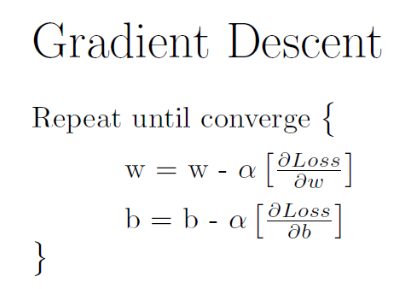

#### *w represents the slope of the line, b represents the bias or intercept of the line

In [190]:
def forward_propagation(X, w, b):
    return w * X + b

def compute_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def backward_propagation(X, y_pred, y_true):
    m = len(y_true)
    dw = np.mean(2 * X * (y_pred - y_true))
    db = np.mean(2 * (y_pred - y_true)) 
    return dw, db
  
def fit(X_train, y_train, num_epochs=10000, learning_rate=0.01, w=1, b=0, threshold=1e-8):
    losses = []
    prev_loss = float('inf')  #'a large value'
    epoch = 0
    
    while epoch < num_epochs:
        y_pred = forward_propagation(X_train, w, b)
        loss = compute_loss(y_pred, y_train)
        losses.append(loss)
        
        dw, db = backward_propagation(X_train, y_pred, y_train)
    
        # update weights
        w -= learning_rate * dw
        b -= learning_rate * db
        
        print(f'Epoch {epoch}: Loss = {loss} Weights: w = {w}, b = {b}') 

        if abs(loss - prev_loss) < threshold:
            break
            
        prev_loss=loss
        epoch += 1

    return w, b, losses

In [191]:
w, b, losses = fit(X_train, y_train)

Epoch 0: Loss = 410.22898099843076 Weights: w = 1.121290283073878, b = 0.40503166786117306
Epoch 1: Loss = 392.54786695336765 Weights: w = 1.2398771178624133, b = 0.8012398612841772
Epoch 2: Loss = 375.63015109891387 Weights: w = 1.3558195441414762, b = 1.1888171612172544
Epoch 3: Loss = 359.44287168033054 Weights: w = 1.469175313004074, b = 1.5679519451364714
Epoch 4: Loss = 343.9544901561347 Weights: w = 1.5800009149885297, b = 1.9388284787951937
Epoch 5: Loss = 329.1348297470024 Weights: w = 1.6883516075927063, b = 2.301627005970935
Epoch 6: Loss = 314.9550166379881 Weights: w = 1.794281442187675, b = 2.6565238362532986
Epoch 7: Loss = 301.38742371949866 Weights: w = 1.8978432903439368, b = 3.003691430915762
Epoch 8: Loss = 288.40561675740264 Weights: w = 1.9990888695830218, b = 3.343298486913136
Epoch 9: Loss = 275.9843028873924 Weights: w = 2.098068768567004, b = 3.675510019045602
Epoch 10: Loss = 264.0992813332418 Weights: w = 2.1948324717382035, b = 4.000487440329352
Epoch 11: L

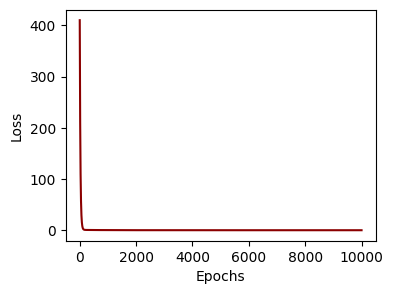

In [192]:
plt.figure(figsize=(4, 3)) 
plt.plot(np.arange(num_epochs), losses, color='darkred')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [193]:
y_pred_loss = compute_loss(forward_propagation(X_test, w, b), y_test)
print("Loss function for test data:", y_pred_loss)

Loss function for test data: 0.07488107214485336


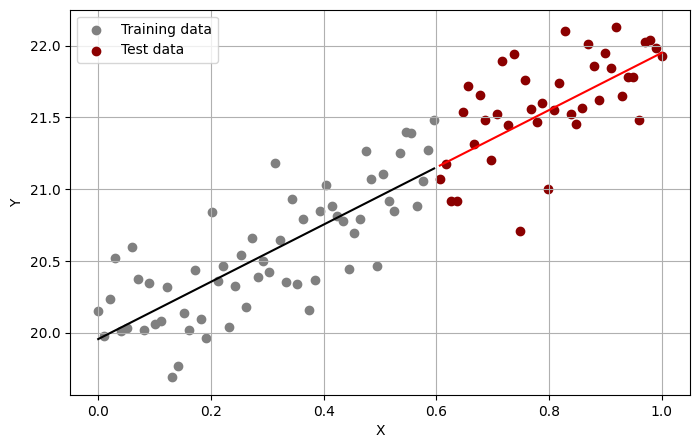

In [194]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training data', color='grey')
plt.plot([min(X_train), max(X_train)], [k * min(X_train) + b, k * max(X_train) + b], color ='black')

plt.scatter(X_test, y_test, label='Test data', color='darkred')
plt.plot([min(X_test), max(X_test)], [k * min(X_test) + b, k * max(X_test) + b], color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()